# Hold-out test dataset evaluation


In [11]:
import pandas as pd

In [32]:
df = pd.read_csv('clients_to_offer_test_dataset.csv')
df

,Client,expected_revenue_cc,expected_revenue_cl,expected_revenue_mf,product_to_offer,expected_revenue,y_test_revenue_cc,y_test_revenue_cl,y_test_revenue_mf,product_to_offer_groundtruth,revenue_groundtruth,expected_revenue_reverseLog
0,1231,0.0,9.012842,0.0,cl,9.012842,0.0,24.434643,0.00000,cl,24.434643,8206.814118
1,1591,0.0,8.581629,0.0,cl,8.581629,0.0,18.535714,0.00000,cl,18.535714,5331.787700
2,611,0.0,7.584398,0.0,cl,7.584398,0.0,10.386786,17.25375,mf,17.253750,1966.261805
3,1291,0.0,7.485552,0.0,cl,7.485552,0.0,11.101429,0.00000,cl,11.101429,1781.107296
4,970,0.0,7.242810,0.0,cl,7.242810,0.0,6.321429,0.00000,cl,6.321429,1397.016252
...,...,...,...,...,...,...,...,...,...,...,...,...
186,361,0.0,0.000000,0.0,cc,0.000000,0.0,0.000000,0.00000,cc,0.000000,0.000000
187,60,0.0,0.000000,0.0,cc,0.000000,0.0,0.000000,0.00000,cc,0.000000,0.000000
188,8,0.0,0.000000,0.0,cc,0.000000,0.0,0.000000,0.00000,cc,0.000000,0.000000
189,687,0.0,0.000000,0.0,cc,0.000000,0.0,0.000000,0.00000,cc,0.000000,0.000000


In [41]:
# replace value in product to offer ground truth with no-purchase when the revenue groundtruth is 0
df['product_to_offer_groundtruth'] = df.apply(lambda x: 'no-purchase' if x['revenue_groundtruth'] == 0 else x['product_to_offer_groundtruth'], axis=1)
df['product_to_offer'] = df.apply(lambda x: 'no-purchase' if x['expected_revenue_reverseLog'] == 0 else x['product_to_offer'], axis=1)

In [42]:
pd.crosstab(df['product_to_offer_groundtruth'], df['product_to_offer'], normalize=True) #.to_clipboard()

product_to_offer,cc,cl,mf,no-purchase
product_to_offer_groundtruth,,,,
cc,0.031414,0.020942,0.005236,0.094241
cl,0.015707,0.078534,0.015707,0.167539
mf,0.005236,0.026178,0.015707,0.115183
no-purchase,0.015707,0.031414,0.000000,0.361257


In [43]:
# performance metrics for the product_to_offer_groundtruth vs product_to_offer
from sklearn.metrics import classification_report

print(classification_report(df['product_to_offer_groundtruth'], df['product_to_offer']))

              precision    recall  f1-score   support

          cc       0.46      0.21      0.29        29
          cl       0.50      0.28      0.36        53
          mf       0.43      0.10      0.16        31
 no-purchase       0.49      0.88      0.63        78

    accuracy                           0.49       191
   macro avg       0.47      0.37      0.36       191
weighted avg       0.48      0.49      0.43       191



In [44]:
# total revenue groundtruth
print(df['revenue_groundtruth'].sum())
print(df['expected_revenue_reverseLog'].sum())

1324.7030357142858
28053.241399664425


In [49]:
# create a column with random cc, cl, mf, no-purchase values based on the probability of the product_to_offer_groudtruth column
import numpy as np

dict_proportion_product_groundtruth = df['product_to_offer_groundtruth'].value_counts(normalize=True)
dict_proportion_product_groundtruth

# np.random.seed(42)
df['random_product_to_offer_stratified'] = np.random.choice(['cc', 'cl', 'mf', 'no-purchase'], 
                                                 size=len(df), 
                                                 p=[dict_proportion_product_groundtruth['cc'], 
                                                    dict_proportion_product_groundtruth['cl'],
                                                    dict_proportion_product_groundtruth['mf'],
                                                    dict_proportion_product_groundtruth['no-purchase']])

In [52]:
pd.crosstab(df['product_to_offer_groundtruth'], df['random_product_to_offer_stratified'], normalize=True).to_clipboard()

In [51]:
print(classification_report(df['product_to_offer_groundtruth'], df['random_product_to_offer_stratified']))

              precision    recall  f1-score   support

          cc       0.16      0.17      0.16        29
          cl       0.24      0.23      0.23        53
          mf       0.10      0.10      0.10        31
 no-purchase       0.40      0.41      0.41        78

    accuracy                           0.27       191
   macro avg       0.22      0.23      0.23       191
weighted avg       0.27      0.27      0.27       191



# Production test dataset evaluation

In [1]:
import pandas as pd

df = pd.read_csv('clients_to_offer.csv')

In [15]:
df[:20]

,Client,expected_revenue_cc,expected_revenue_cl,expected_revenue_mf,product_to_offer,expected_revenue,y_test_revenue_cc,y_test_revenue_cl,y_test_revenue_mf,product_to_offer_groundtruth,revenue_groundtruth,expected_revenue_reverseLog,product_to_offer_ground_truth
0,1231,0.000000,9.012842,0.000000,cl,9.012842,0.000000,24.434643,0.000000,cl,24.434643,8206.814118,cl
1,1591,0.000000,8.581629,0.000000,cl,8.581629,0.000000,18.535714,0.000000,cl,18.535714,5331.787700,cl
2,611,0.000000,7.584398,0.000000,cl,7.584398,0.000000,10.386786,17.253750,mf,17.253750,1966.261805,mf
3,1291,0.000000,7.485552,0.000000,cl,7.485552,0.000000,11.101429,0.000000,cl,11.101429,1781.107296,cl
4,970,0.000000,7.242810,0.000000,cl,7.242810,0.000000,6.321429,0.000000,cl,6.321429,1397.016252,cl
5,280,0.000000,7.169997,0.000000,cl,7.169997,0.000000,0.000000,0.000000,cc,0.000000,1298.840860,no-purchase
6,1408,6.912542,0.000000,0.000000,cc,6.912542,5.357143,0.000000,1.663571,cc,5.357143,1003.797889,cc
7,225,0.000000,6.759149,0.000000,cl,6.759149,0.000000,8.130714,0.000000,cl,8.130714,860.908563,cl
8,249,0.000000,6.562161,0.000000,cl,6.562161,0.000000,11.750000,0.000000,cl,11.750000,706.799925,cl
9,1033,0.000000,6.541829,0.000000,cl,6.541829,0.000000,2.702500,1.129107,cl,2.702500,692.554028,cl


product_to_offer
cl    95
cc    45
mf    10
Name: count, dtype: int64

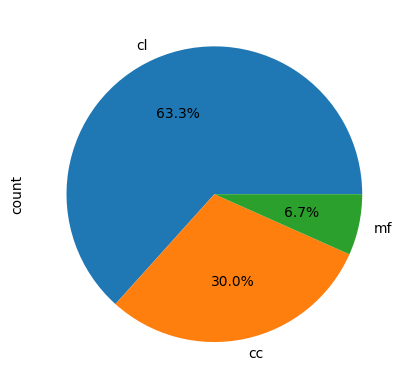

In [4]:
# build pie chart for product_to_offer
df['product_to_offer'].value_counts().plot.pie(autopct='%1.1f%%')

# add count of product_to_offer
df['product_to_offer'].value_counts()